# How I Use Numpy Arrays

I'll use a simple use case to describe how I use numpy arrays. Say I have a 2D array $A$ of fourier series coefficients (all real for now), and I want to plot the 2D wave that it represents. The formula I want to plot is as follows:

$$
    f(x,y) = \sum_n { \sum_m { A_{nm}\ sin(n\ x)\ sin (m\ y) } }
$$

In [1]:
%matplotlib widget
import ipywidgets as widgets
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (8, 8)

There are four variables in the above equation, two of which are summed. I'd represent each of these variables as a dimension in a numpy array which I'd use to compute the final result. This way I can represent operations on the entire array with single statements. $x$ and $y$ are our input variables, which we can represent with the first two dimensions

In [2]:
def generate_wave(A, samples=50):
    """
    Generate a 2D wave surface with x, y, z components
    given matrix A of fourier coefficients
    """
    n, m = A.shape
    t = np.linspace(0, 2 * np.pi, samples)
    X,Y,N,M = np.meshgrid(t, t, np.arange(n) + 1, np.arange(m) + 1)
    Z = A * np.sin(X * N) * np.sin(Y * M)
    x,y = np.meshgrid(t,t)
    z = Z.sum((2, 3))
    return x, y, z

Below is a mini application that you can use to explore the above code using different modes and randomly generated values

IntSlider(value=5, description='# Modes in X', max=10, min=1)

IntSlider(value=3, description='# Modes in Y', max=10, min=1)

Button(description='Generate', style=ButtonStyle())

Output()

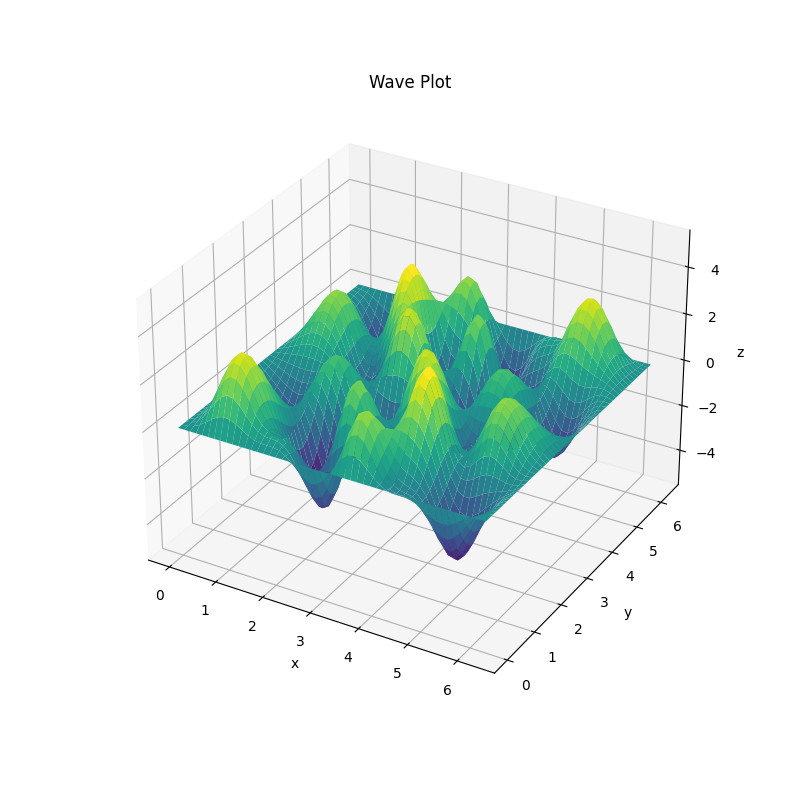

In [3]:
# Widgets layout
n = widgets.IntSlider(value=5, min=1, max=10, description='# Modes in X')
m = widgets.IntSlider(value=3, min=1, max=10, description='# Modes in Y')
genbutton = widgets.Button(description='Generate')
output = widgets.Output()
with output:
    fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

def new_plot(event=None):
    """
    Generate new wave and plot it
    """
    rng = np.random.default_rng()
    A = rng.uniform(-1, 1, (n.value, m.value))
    x, y, z = generate_wave(A)
    with output:
        ax.clear()
        ax.plot_surface(x,y,z, cmap='viridis')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.set_zlim(-(n.value + m.value)/1.5, (n.value + m.value)/1.5)
        ax.set_title('Wave Plot');

# Display widgets
display(n,m,genbutton)
display(output)
new_plot()
genbutton.on_click(new_plot)